In [29]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

In [23]:
data = pd.read_csv('dataset.csv')
features = data.drop(columns='target')
x_train, x_test, y_train, y_test = \
    train_test_split(features, data['target'], random_state=1)

In [24]:
results_train = []
results_test = []
pipelines = []
neighbors = list(range(1, 25))

In [25]:
for n in neighbors:
    exported_pipeline = KNeighborsClassifier(n, weights='uniform')
    exported_pipeline.fit(x_train, y_train)

    results_train.append(exported_pipeline.score(x_train, y_train))
    results_test.append(exported_pipeline.score(x_test, y_test))
    pipelines.append(exported_pipeline)
    
    exported_pipeline = KNeighborsClassifier(n, weights='distance')
    exported_pipeline.fit(x_train, y_train)

    results_train.append(exported_pipeline.score(x_train, y_train))
    results_test.append(exported_pipeline.score(x_test, y_test))
    pipelines.append(exported_pipeline)

In [26]:
best = results_test.index(max(results_test))
print(f"Score of best model: {results_test[best]}")
print(f"Best choice for number of neighbors: {neighbors[best // 2]}")
print(f"Best choice for weights: {'distance' if best%2 else 'uniform'}")

Score of best model: 0.8825688073394495
Best choice for number of neighbors: 5
Best choice for weights: distance


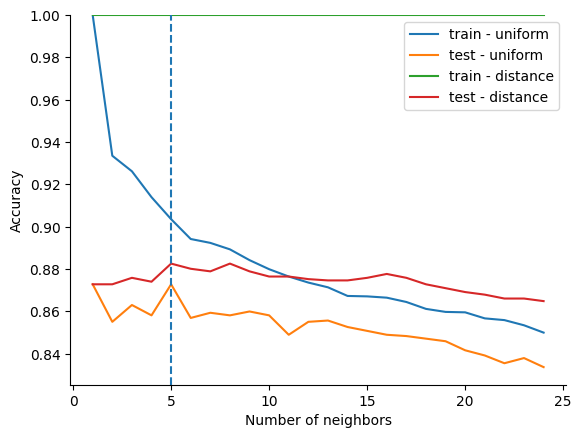

In [40]:
_, ax = plt.subplots()

ax.plot(neighbors, results_train[0::2], label="train - uniform")
ax.plot(neighbors, results_test[0::2], label="test - uniform")
ax.plot(neighbors, results_train[1::2], label="train - distance")
ax.plot(neighbors, results_test[1::2], label="test - distance")

ax.set_ylim(ymax=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Number of neighbors')
ax.set_ylabel('Accuracy')
ax.axvline(x=neighbors[best//2], linestyle='dashed')
ax.legend()

plt.show()

Water (g)            0
Energy (Kcal)        0
Protein (g)          0
Lipids (g)           0
Carbohydrates (g)    0
Calcium (mg)         0
Iron (mg)            0
Potassium (mg)       0
Sodium (mg)          0
Saturated Fat (g)    0
Cholesterol (mg)     0
dtype: int64


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

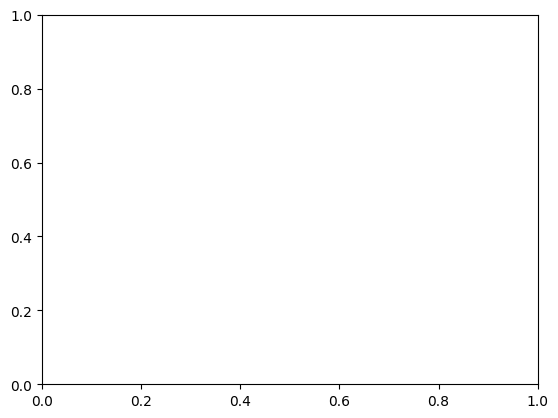

In [20]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    pipelines[best],
    x_train,
    # cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=x_train.columns.values[0],
    ylabel=x_train.columns.values[1],
    shading="auto",
)

# # Plot also the training points
# sns.scatterplot(
#     x=X[:, 0],
#     y=X[:, 1],
#     hue=iris.target_names[y],
#     palette=cmap_bold,
#     alpha=1.0,
#     edgecolor="black",
# )
# plt.title(
#     "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
# )

plt.show()

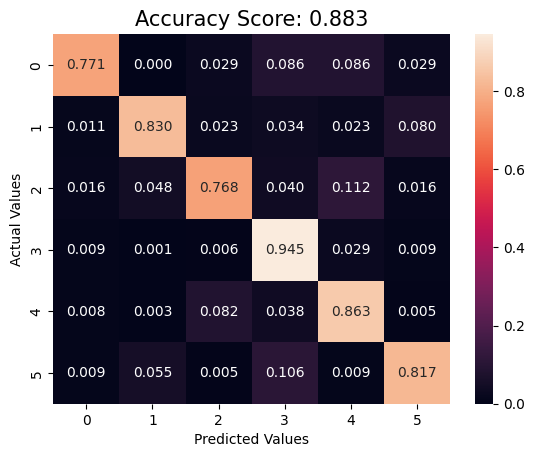

In [28]:
predictions = pipelines[best].predict(x_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions, normalize='true')
sns.heatmap(cm1, annot=True, fmt=".3f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()